In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 

In [3]:
file = "C:/Users/adria/Git/AnQSM_Tere/ENCUESTAS/concentrado.csv"
data = pd.read_csv(file, usecols=["edad","genero","facebook","twitter","whatsapp","snapchat","instagram","messenger","youtube","tiktok","videojuegos"])

In [4]:
data["facebook"]=pd.to_numeric(data["facebook"], errors='coerce')
data.head()

,edad,genero,facebook,twitter,whatsapp,snapchat,instagram,messenger,youtube,tiktok,videojuegos
0,12.0,MASCULINO,1.0,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN
1,12.0,MASCULINO,1.0,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN
2,12.0,FEMENINO,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
3,12.0,MASCULINO,1.0,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN
4,14.0,MASCULINO,1.0,NaN,1.0,1.0,NaN,1.0,1.0,NaN,NaN


In [5]:
data.describe()

,edad,facebook,twitter,whatsapp,snapchat,instagram,messenger,youtube,tiktok,videojuegos
count,200.000000,144.0,17.0,56.0,27.0,84.0,32.0,69.0,10.0,38.0
mean,13.440000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,2.636504,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,8.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,11.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,13.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,16.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,18.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [6]:
masculino = data[data["genero"]== "MASCULINO"]
femenino = data[data["genero"]== "FEMENINO"]

In [7]:
masculino.describe()

,edad,facebook,twitter,whatsapp,snapchat,instagram,messenger,youtube,tiktok,videojuegos
count,106.000000,81.0,11.0,27.0,10.0,45.0,18.0,34.0,5.0,17.0
mean,13.933962,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,2.764637,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,8.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,12.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,14.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,17.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,18.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [8]:
femenino.describe()

,edad,facebook,twitter,whatsapp,snapchat,instagram,messenger,youtube,tiktok,videojuegos
count,89.000000,61.0,6.0,28.0,17.0,39.0,14.0,30.0,4.0,16.0
mean,12.988764,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,2.386012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,9.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,11.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,12.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,14.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,18.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [9]:
columnas = ["facebook","twitter","whatsapp","snapchat","instagram","messenger","youtube","tiktok","videojuegos"]

In [10]:
def sdata(data, columnas):
    dat = {}
    for columna in columnas:
        dat.update({columna:data[columna].sum()})
    return dat

In [11]:
def grafico(dato1, dato2, columnas, nivel=None):
    
    mdata = sdata(dato1, columnas) # suma de valores por columna
    fdata = sdata(dato2, columnas)
    fig, ax = plt.subplots(figsize=(10, 5))

    men = list(mdata.values()) #extraccion de valores
    women = list(fdata.values())
    x = np.arange(len(columnas)) #vertor x
    width = 0.35 #ancho de la columna

    male = ax.bar(x - width/2, men, width, label= "masculino")     #graficos masculino
    female = ax.bar(x + width/2, women, width, label= "femenino")  #graficos femenino
    if nivel == None:
        ax.set_title("Uso de redes sociales por genero")
    else:
        ax.set_title("Uso de redes sociales por genero en edades de {} a {} años".format(nivel[0], nivel[1]))
            
    ax.set_ylabel("No. de Usuarios")
    ax.set_xticks(x)
    ax.set_xticklabels(columnas)
    ax.legend()
    
    #funcion que pone el valor sobre la columna 
    for rect in male:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
    
    for rect in female:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

    fig.tight_layout()

    plt.show()

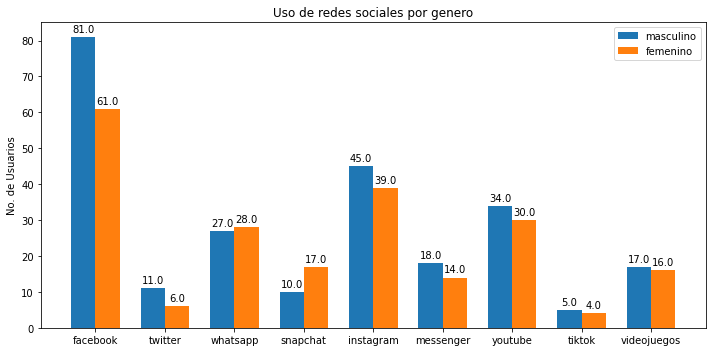

In [12]:
grafico(masculino,femenino,columnas)

In [13]:
primaria = (6,12)
secundaria = (13,15)
preparatoria = (16,18)

In [14]:
primaria_masculino = masculino[masculino["edad"] >= primaria[0] ]
primaria_masculino = primaria_masculino[primaria_masculino["edad"] <= primaria[1]]
primaria_femenino = femenino[femenino["edad"] >= primaria[0] ]
primaria_femenino = primaria_femenino[primaria_femenino["edad"] <= primaria[1]]
print("primaria femenino")
primaria_femenino.describe()

primaria femenino


,edad,facebook,twitter,whatsapp,snapchat,instagram,messenger,youtube,tiktok,videojuegos
count,48.000000,23.0,1.0,11.0,4.0,8.0,3.0,23.0,2.0,16.0
mean,11.187500,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.866793,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,9.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,10.750000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,11.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,12.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,12.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [15]:
print("primaria masculino")
primaria_masculino.describe()

primaria masculino


,edad,facebook,twitter,whatsapp,snapchat,instagram,messenger,youtube,tiktok,videojuegos
count,40.000000,17.0,0.0,5.0,3.0,6.0,7.0,24.0,4.0,14.0
mean,10.900000,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,1.172331,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,8.000000,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,10.000000,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,11.000000,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,12.000000,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,12.000000,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [16]:
secundaria_masculino = masculino[masculino["edad"] >= secundaria[0] ]
secundaria_masculino = secundaria_masculino[secundaria_masculino["edad"] <= secundaria[1]]
secundaria_femenino = femenino[femenino["edad"] >= secundaria[0] ]
secundaria_femenino = secundaria_femenino[secundaria_femenino["edad"] <= secundaria[1]]

print("secundaria femenino")
secundaria_masculino.describe()

secundaria femenino


,edad,facebook,twitter,whatsapp,snapchat,instagram,messenger,youtube,tiktok,videojuegos
count,25.000000,23.0,3.0,18.0,5.0,10.0,10.0,7.0,1.0,2.0
mean,13.960000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,0.734847,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,0.0
min,13.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,13.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,14.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,14.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,15.000000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [17]:
print("secundaria masculino")
secundaria_femenino.describe()

secundaria masculino


,edad,facebook,twitter,whatsapp,snapchat,instagram,messenger,youtube,tiktok,videojuegos
count,23.000000,19.0,0.0,16.0,8.0,14.0,10.0,7.0,2.0,0.0
mean,13.652174,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN
std,0.775107,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN
min,13.000000,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN
25%,13.000000,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN
50%,13.000000,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN
75%,14.000000,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN
max,15.000000,1.0,NaN,1.0,1.0,1.0,1.0,1.0,1.0,NaN


In [18]:
preparatoria_masculino = masculino[masculino["edad"] >= preparatoria[0] ]
preparatoria_masculino = preparatoria_masculino[preparatoria_masculino["edad"] <= preparatoria[1]]
preparatoria_femenino = femenino[femenino["edad"] >= preparatoria[0] ]
preparatoria_femenino = preparatoria_femenino[preparatoria_femenino["edad"] <= preparatoria[1]]

print("preparatoria femenino")
preparatoria_masculino.describe()

preparatoria femenino


,edad,facebook,twitter,whatsapp,snapchat,instagram,messenger,youtube,tiktok,videojuegos
count,41.000000,39.0,8.0,3.0,2.0,29.0,1.0,0.0,0.0,0.0
mean,16.878049,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
std,0.556557,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
min,16.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
25%,17.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
50%,17.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
75%,17.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
max,18.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


In [19]:
print("preparatoria masculino")
preparatoria_femenino.describe()

preparatoria masculino


,edad,facebook,twitter,whatsapp,snapchat,instagram,messenger,youtube,tiktok,videojuegos
count,18.000000,17.0,5.0,1.0,5.0,15.0,1.0,0.0,0.0,0.0
mean,16.944444,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
std,0.539305,0.0,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN
min,16.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
25%,17.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
50%,17.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
75%,17.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
max,18.000000,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


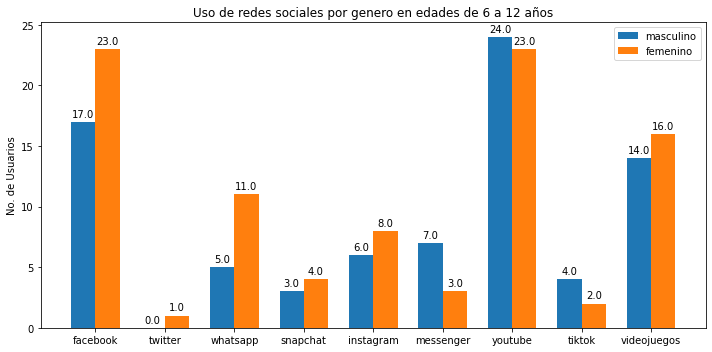

In [20]:
grafico(primaria_masculino,primaria_femenino,columnas,primaria)

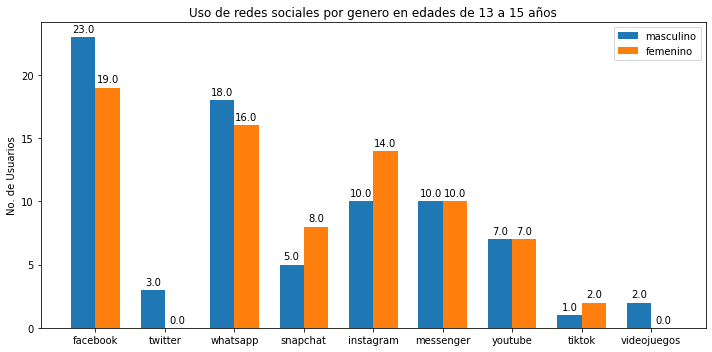

In [21]:
grafico(secundaria_masculino,secundaria_femenino,columnas,secundaria)

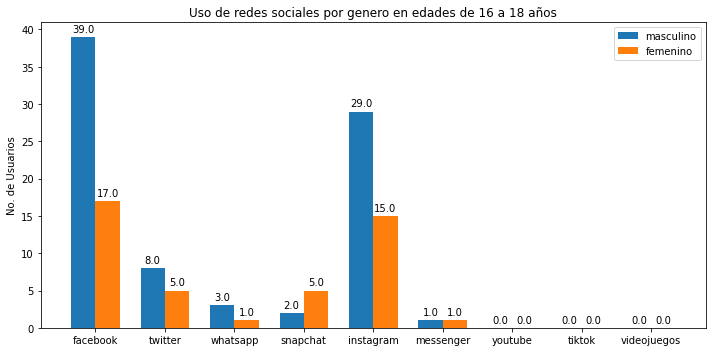

In [22]:
grafico(preparatoria_masculino,preparatoria_femenino,columnas,preparatoria)